In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

# Splitting Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import plot_tree


In [2]:
#importing data
data = pd.read_csv("data.csv")
data.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#size of dataset
data.shape

(22792, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   work-class      22792 non-null  object
 2   work-fnl        22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   position        22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22792 non-null  object
 14  salary          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [5]:
#summarizing data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,22792.0,38.593542,13.657228,17.0,28.0,37.0,48.0,90.0
work-fnl,22792.0,189633.717138,104966.047094,12285.0,118376.0,178384.0,236789.0,1484705.0
education-num,22792.0,10.084065,2.556860,1.0,9.0,10.0,12.0,16.0
capital-gain,22792.0,1061.232757,7342.691929,0.0,0.0,0.0,0.0,99999.0
capital-loss,22792.0,86.730037,400.970842,0.0,0.0,0.0,0.0,4356.0
hours-per-week,22792.0,40.409705,12.283072,1.0,40.0,40.0,45.0,99.0


In [192]:
#check presence of null values
data.isnull().sum()

age               0
work-class        0
work-fnl          0
education         0
education-num     0
marital-status    0
position          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [193]:
# trim column values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [211]:
# remove columns with "?" values
data = data[~(data.T == '?').any()]

In [217]:
#remove duplicate rows
data = data.drop_duplicates()
data.shape

(21108, 15)

In [218]:
#map diagnosis as binary attribute
df = data
# data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df.head()

,age,work-class,work-fnl,education,education-num,marital-status,position,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:ylabel='Diagnosis'>

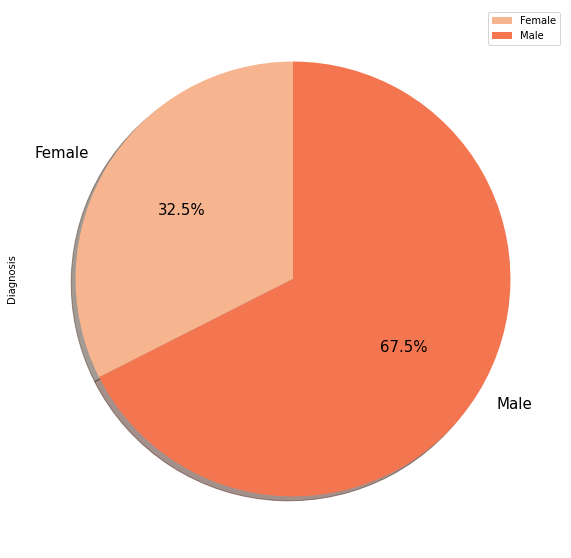

In [227]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('rocket_r')
data.groupby('sex').size().plot(kind='pie',label='Diagnosis',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=15, 
                               shadow=True, startangle=90)

<AxesSubplot:ylabel='Diagnosis'>

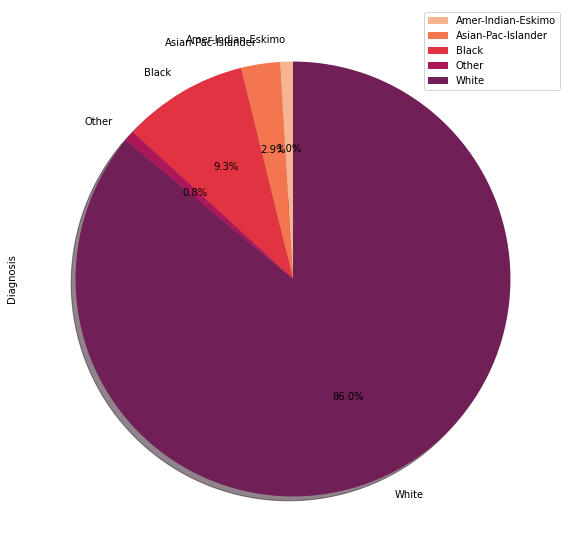

In [242]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('rocket_r')
data.groupby('race').size().plot(kind='pie',label='Diagnosis',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=10, 
                               shadow=True, startangle=90)

<AxesSubplot:ylabel='Diagnosis'>

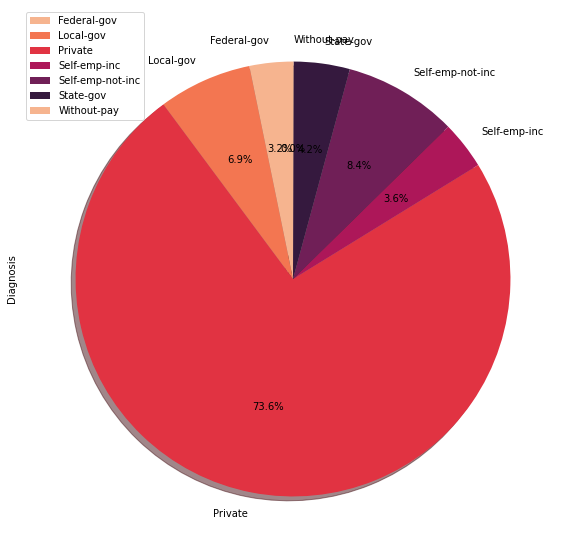

In [229]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('rocket_r')
data.groupby('work-class').size().plot(kind='pie',label='Diagnosis',
                               autopct='%.1f%%', legend=True, colors=colors, 
                               shadow=True, startangle=90)

<AxesSubplot:ylabel='Diagnosis'>

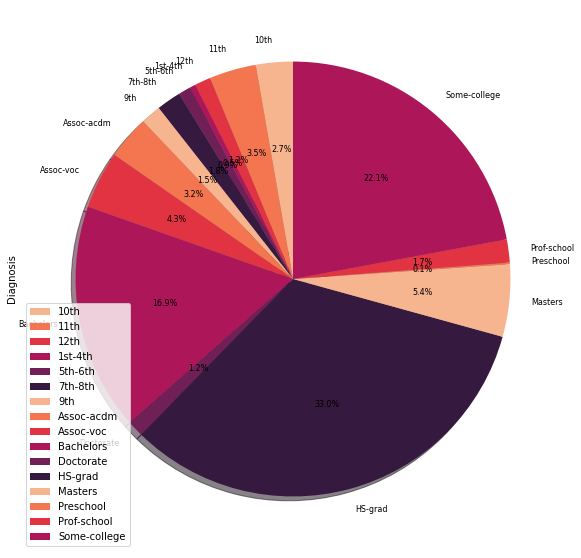

In [234]:
plt.figure(figsize=(15, 10))
colors = sns.color_palette('rocket_r')
data.groupby('education').size().plot(kind='pie',label='Diagnosis',
                               autopct='%.1f%%', legend=True, colors=colors, fontsize=8, 
                               shadow=True, startangle=90)

<AxesSubplot:ylabel='Diagnosis'>

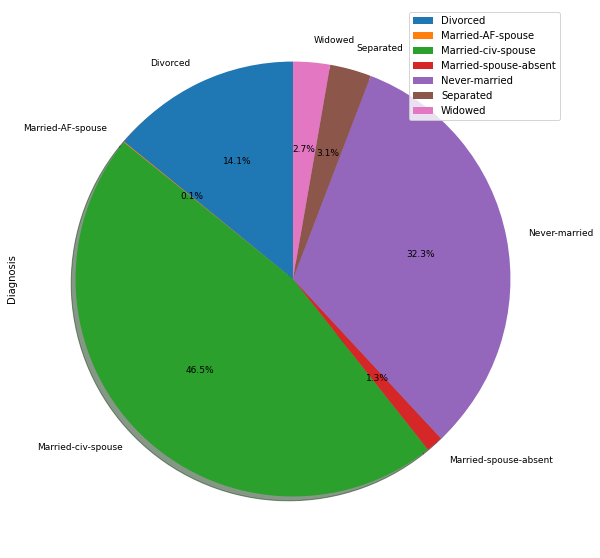

In [237]:
plt.figure(figsize=(15, 10))
data.groupby('marital-status').size().plot(kind='pie',label='Diagnosis',
                               autopct='%.1f%%', legend=True, fontsize=9, 
                               shadow=True, startangle=90)